In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
#pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Load the Titanic dataset
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   survived    891 non-null    int64
 1   pclass      891 non-null    int32
 2   sex         891 non-null    int64
 3   age         891 non-null    int32
 4   sibsp       891 non-null    int64
 5   parch       891 non-null    int64
 6   fare        891 non-null    int32
 7   embarked    891 non-null    int64
 8   adult_male  891 non-null    int64
 9   alone       891 non-null    int64
dtypes: int32(3), int64(7)
memory usage: 59.3 KB


In [6]:
missing_data = (titanic.isnull().sum()/ len(titanic)) *100
missing_data.sort_values(ascending = False)

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
survived        0.000000
pclass          0.000000
sex             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
class           0.000000
who             0.000000
adult_male      0.000000
alive           0.000000
alone           0.000000
dtype: float64

<Axes: >

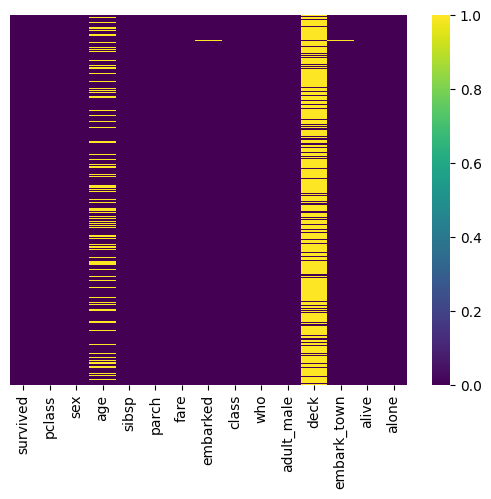

In [7]:

sns.heatmap(titanic.isnull(), yticklabels = False, cmap = 'viridis')

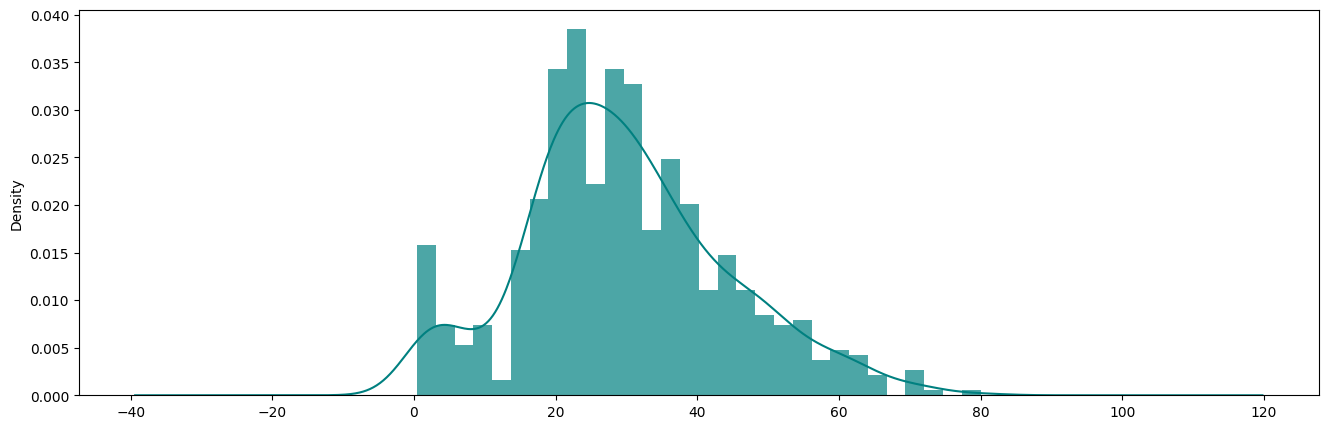

In [8]:
ax = titanic['age'].hist(bins = 30, density = True, stacked = True, color = 'teal', alpha = 0.7, figsize = (16, 5))
titanic['age'].plot(kind = 'density', color = 'teal')
ax.set_label('Age')
plt.show()

C:\Users\paawa\AppData\Local\Temp\ipykernel_344\3114610695.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(women[women[survived]== 1].age.dropna(), bins = 10, label = survived, ax = axes[0], kde = False)
C:\Users\paawa\AppData\Local\Temp\ipykernel_344\3114610695.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

Text(0.5, 1.0, 'Male')

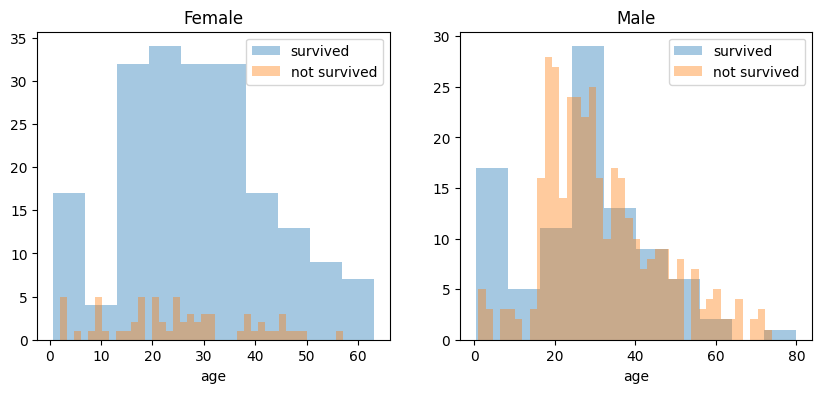

In [9]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows =1, ncols= 2, figsize= (10,4))
women = titanic[titanic['sex']== 'female']
men = titanic[titanic['sex']== 'male']

ax = sns.distplot(women[women[survived]== 1].age.dropna(), bins = 10, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women[survived]== 0].age.dropna(), bins = 40, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men[survived]== 1].age.dropna(), bins = 10, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men[survived]== 0].age.dropna(), bins = 40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

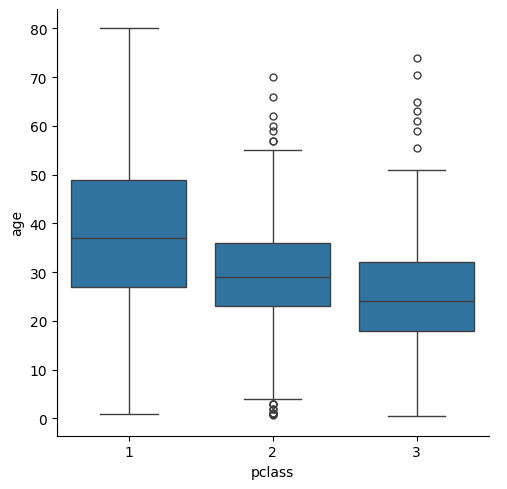

In [10]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'box')

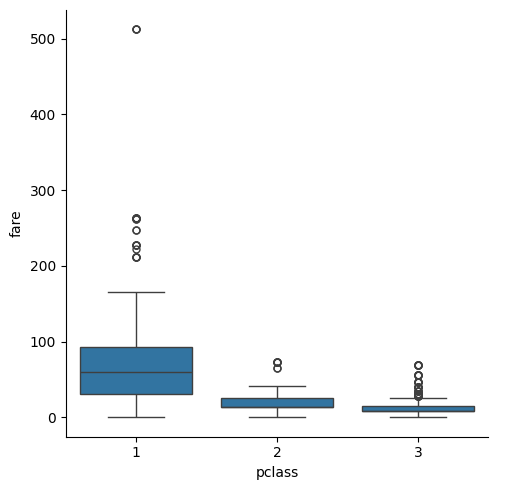

In [11]:
sns.catplot(x = 'pclass', y= 'fare', data = titanic, kind = 'box')

In [12]:
titanic[titanic['pclass']== 1]['age'].mean()

38.233440860215055

In [13]:
titanic[titanic['pclass']== 2]['age'].mean()

29.87763005780347

In [14]:
titanic[titanic['pclass']== 3]['age'].mean()

25.14061971830986

In [15]:
def input_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return titanic[titanic['pclass']== 1]['age'].mean()
        elif pclass == 2:
            return titanic[titanic['pclass']== 2]['age'].mean()
        elif pclass == 3:
            return titanic[titanic['pclass']== 3]['age'].mean()
    else:
        return age

In [16]:
titanic['age']= titanic[['age', 'pclass']].apply(input_age, axis = 1)

C:\Users\paawa\AppData\Local\Temp\ipykernel_344\1596535121.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = cols[0]
C:\Users\paawa\AppData\Local\Temp\ipykernel_344\1596535121.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pclass = cols[1]


In [17]:
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [18]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace= True)

C:\Users\paawa\AppData\Local\Temp\ipykernel_344\3363828774.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace= True)


<Axes: >

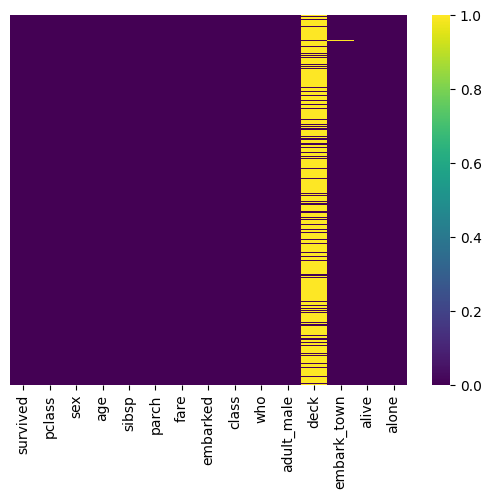

In [19]:
sns.heatmap(titanic.isnull(), yticklabels = False, cmap = 'viridis')

In [20]:
titanic.drop(labels= ['deck', 'embark_town', 'alive'], inplace = True, axis= 1)

<Axes: >

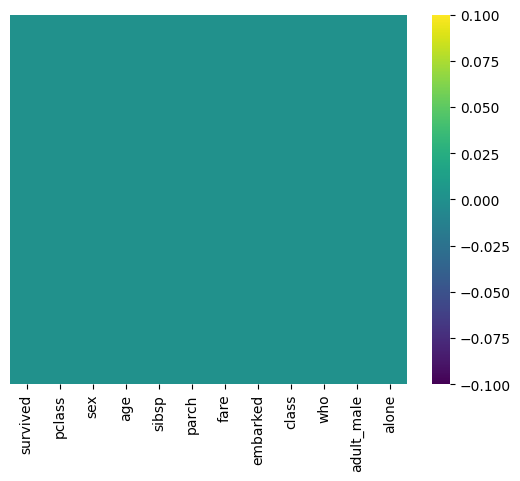

In [21]:

sns.heatmap(titanic.isnull(), yticklabels = False, cmap = 'viridis')

In [22]:
titanic['fare'] = titanic['fare'].astype('int')
titanic['age'] = titanic['age'].astype('int')
titanic['pclass'] = titanic['pclass'].astype('int')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int32   
 2   sex         891 non-null    object  
 3   age         891 non-null    int32   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    int32   
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), int32(3), int64(3), object(3)
memory usage: 55.1+ KB


In [23]:
# converting categorical data into numerical data
genders = { 'male': 0, 'female': 1}
titanic['sex'] =  titanic['sex'].map(genders)

In [24]:
who = {'man': 0, 'woman': 1, 'child': 2}
titanic['who'] = titanic['who'].map(who)

In [25]:
adult_male = {True: 1, False: 0}
titanic['adult_male']= titanic['adult_male'].map(adult_male)

In [26]:
alone = {True: 1, False: 0}
titanic['alone']= titanic['alone'].map(alone)

In [27]:
ports = {'S': 0, 'C': 1, 'Q':2}
titanic['embarked']= titanic['embarked'].map(ports)

In [28]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,0,Third,0,1,0
1,1,1,1,38,1,0,71,1,First,1,0,0
2,1,3,1,26,0,0,7,0,Third,1,0,1
3,1,1,1,35,1,0,53,0,First,1,0,0
4,0,3,0,35,0,0,8,0,Third,0,1,1


In [29]:
titanic.drop(labels = ['class', 'who'], axis = 1, inplace = True)

In [30]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1


In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   survived    891 non-null    int64
 1   pclass      891 non-null    int32
 2   sex         891 non-null    int64
 3   age         891 non-null    int32
 4   sibsp       891 non-null    int64
 5   parch       891 non-null    int64
 6   fare        891 non-null    int32
 7   embarked    891 non-null    int64
 8   adult_male  891 non-null    int64
 9   alone       891 non-null    int64
dtypes: int32(3), int64(7)
memory usage: 59.3 KB


In [32]:
# Bulding logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [33]:
X = titanic.drop('survived', axis = 1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [1]:
X_train.tail()

NameError: name 'X_train' is not defined

In [34]:
X_train.shape

(623, 9)

In [35]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\paawa\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [37]:
model.score(X_test, y_test)

0.8171641791044776

In [38]:
import pickle

# Define the filename for the saved model
filename = 'logistic_regression_model.pkl'

# Open the file in write and binary mode and save the model
with open(filename, 'wb') as file:
    pickle.dump(model, file)
